# 14. 단순회귀분석

In [1]:
#필요한 라이브러리, 함수 모음.
import math
from collections import Counter, defaultdict
import random
import matplotlib.pyplot as plt

def mean(x):
    return sum(x) / len(x)

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

### 14-1. 모델

- 두 변수 A, B의 관계를 설명해주는 '모형'.
- 이 관계는 α, β라는 상수를 포함하는 수식으로 아래와 같이 표현 가능.
        y = βx + α + ε
        * x, y: 상관관계를 밝히고자 하는 변수들
        * ε: 모델이 고려하지 못하는 다른 요소 떄문에 발생하는 오차

- α, β가 이미 구해졌다고 가정하면, 다음과 같은 함수를 통해 간단하게 예측할 수 있음.

In [3]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

- 실제 출력값인 y_i는 이미 주어졌으니 다양한 α, β에 대한 ε(오차)를 계산할 수 있음.

In [4]:
def error(alpha, beta, x_i, y_i):
    """실제 결과가 y일 때, beta * x + alpha로 계산된 예측값의 ε"""
    return y_i - predict(alpha, beta, x_i)

- 이제, 데이터 전체에서 발생하는 총 오류값을 구하고자 한다.
- 이 때, 무작정 모든 오류값을 더하면 안 된다. 
- 예를 들어, x1의 에측값이 너무 높고 x2의 예측값이 너무 낮다면, 오류값이 서로 상쇄되기 때문이다.
- 이에 대한 해결책으로, 오류의 제곱 값을 더해줘야 한다.

In [5]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))

- 이를 '최소자승법'이라고 한다.
- 최소자승법: sum_of_squared_errors를 최소화해주는 알파, 베타값을 찾는 것.
- 미분을 사용하면 최소자승법을 구현할 수 있다.

In [6]:
def least_squares_fit(x, y):
    """x, y가 학습 데이터로 주어졌을 때 오류의 제곱 값을 최소화해 주는 알파와 베타를 계산."""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

- 위 식의 증명
    * alpha는 독립변수 x의 평균이 주어질 때 종속변수 y의 평균을 예측해 준다.
    * beta는 입력변수가 standard_deviation(x)만큼 증가한다면 에측값 또한 correlation(x, y) * standard_deviation(y)만큼 증가함을 의미함.

In [7]:
#이상치가 없는 데이터를 위 식에 적용(num_friends_good:친구 수, daily_minutes_good: 하루 SNS 이용시간 )

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print(alpha, beta) #n명의 친구가 있는 사용자는, 하루 평균 22.95 + (n * 0.903)분을 SNS 사이트에서 보낸다.
                   #친구가 1명 늘어날수록, 0.9분을 다 SNS 이용에 쏟는다.

22.94755241346903 0.903865945605865


In [8]:
regression = [predict(alpha, beta, x_i) for x_i in num_friends_good]

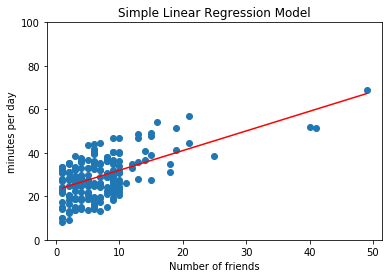

In [10]:
#모델이 주어진 데이터에 얼마나 적합한지 확인하기: ①그래프를 통해.
plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(num_friends_good, regression, '-', color = 'red')
plt.xlabel("Number of friends")
plt.ylabel("minutes per day")
plt.title("Simple Linear Regression Model")
plt.xticks(list(range(0, 51, 10)))
plt.yticks(list(range(0, 101, 20)))
plt.show()
#회귀선 추가 필요

In [11]:
#모델이 주어진 데이터에 얼마나 적합한지 확인하기: ②결정계수(R squared) 이용.
#결정계수란, 종속변수의 총 변화량 중 모델이 잡아낼 수 있는 변화량의 비율을 의미함.

def total_sum_of_squares(y):
    """평균을 기준으로 y_i의 변화량을 제곱한 값의 총합"""
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """모델이 잡아낼 수 있는 변화량의 비율은 (1 - 모델이 잡아내지 못하는 변화량)의 비율로 계산할 수 있다."""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_good, daily_minutes_good) #0.329

0.3291078377836305

- 최소자승법 모델의 성능은 평균을 예측하는 모델의 성능만큼 좋아야 한다.
- 즉, 오차를 제곱한 값의 총합이 아무리 커 봐야 변화량을 제곱한 값의 총합과 동일하다.
- R squared값이 클수록 모델이 데이터에 적합하다는 것을 의미한다.

### 14-2. 경사하강법 사용하기

In [12]:
#이 책 8장의 '걍시히깅법'을 통해 모델 만들기.

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),        #알파에 대한 편미분
            -2 * error(alpha, beta, x_i, y_i) * x_i]  #베타에 대한 편미분

#임의의 알파, 베타값으로 시작
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                 squared_error_gradient,
                                 num_friends_good,
                                 daily_minutes_good,
                                 theta,
                                 0.001)
print(alpha, beta)

22.965287407897915 0.9010348760241662


### 14-3. 최대우도추정법(MLE, Maximum Likelihood Estimation)

- 최소 자승법을 사용하는 이유: 최대우도추정법을 사용하기 위함이다.
- 책의 설명 대신, 아래 링크로 갈음한다.

https://ratsgo.github.io/statistics/2017/09/23/MLE/

https://datascienceschool.net/view-notebook/79140e6a9e364bcbb04cb8e525b9dba4/